<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
(891, 12)
Your selected dataframe has 12 columns.
There are 3 columns that have missing values.
(418, 11)
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Percentage of PClass survived is given below

Survived     0     1
Pclass              
1         37.0  63.0
2         53.0  47.0
3         76.0  24.0


Survived    0    1
Sex               
female     81  233
male

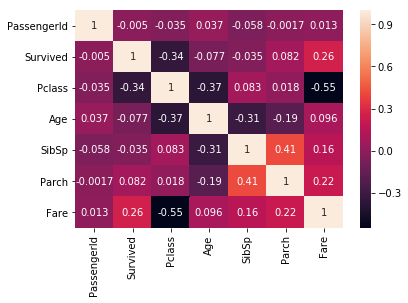

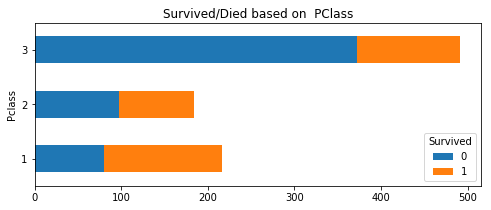

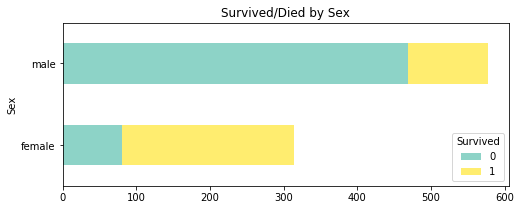

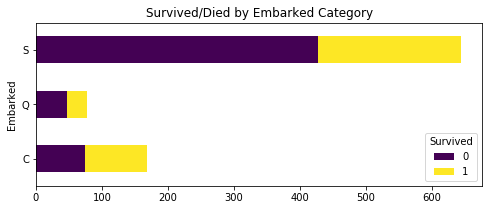

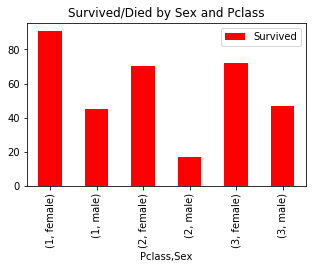

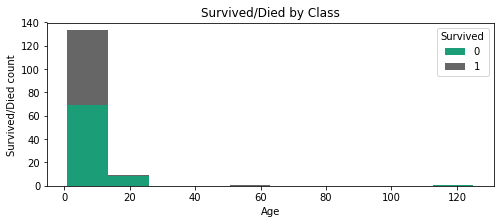

In [52]:
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # for visualization
%matplotlib inline

############################################## Analysis of Training set ##########################################
#Read the train.csv file
df= pd.read_csv('../data/train.csv')
df.head(10)

#To identify the datatypes of the features
df.info()

#To study the outliers
df.describe()

#To understand the correlation between the features
sns.heatmap(df.corr(),annot=True)

#Number of rows and columns in 'training' dataset
print(df.shape)

#Data analysis 
#Missing values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        #print("Missing values are. \n" + str(mis_val))
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        #print(mis_val_percent)
        
        # Make a table with the results
             
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        #print("Missing value table is \n" + str(mis_val_table))
        
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(index=str,
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

#Identify the number of unique values in the features
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

############################################### Test data ###################################

df_test =  pd.read_csv('../data/test.csv')
print(df_test.shape)
#############################################################################################



######################################### Exploratory data analysis ##############################333

#To understand the relationship between the features, we plot graphs here

#Step 1: Relationship between PClass and Survival

group_by_pclass = df.groupby(['Pclass','Survived'])
group_by_pclass.size()

count_survived_by_pclass = group_by_pclass.size().unstack()
print(count_survived_by_pclass)

count_survived_by_pclass.plot(kind='barh', stacked=True, figsize=[8,3],title="Survived/Died based on  PClass")

print("Percentage of PClass survived is given below\n")
pclass_pcts = pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100), axis=1)
print(pclass_pcts)
print("\n")


#Step 2: Relationship between Sex and Survival

group_by_sex = df.groupby(['Sex','Survived'])
group_by_sex.size()

count_survived_by_sex = group_by_sex.size().unstack()
print(count_survived_by_sex)

count_survived_by_sex.plot(kind='barh', stacked=True, figsize=[8,3],title="Survived/Died by Sex",colormap="Set3")


print("Percentage of Male/Female survived is given below\n")
sex_pcts = pd.crosstab(df['Sex'],df['Survived']).apply(lambda r: round((r/r.sum())*100), axis=1)
print(sex_pcts)
print("\n")

#Step 3: Relationship between Embarked and Survival

df.head()

## Percentage of survivors in Embarked 

group_by_embarked = df.groupby(['Embarked','Survived'])
group_by_embarked.size()

count_survived_by_embarked = group_by_embarked.size().unstack()
print(count_survived_by_embarked)

count_survived_by_embarked.plot(kind='barh', stacked=True, figsize=[8,3],title="Survived/Died by Embarked Category",colormap="viridis")


print("Percentage of Embarked Category survived is given below\n")
embarked_pcts = pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r: round((r/r.sum())*100), axis=1)
print(embarked_pcts)
print("\n")

#Grouping PClass and Sex to find the total number of survivors

grouped_pclass_sex = df.groupby(['Pclass','Sex']).agg({"Survived" : "sum"})

grouped_pclass_sex.rename(columns={'Survived':'Total survivors'})

grouped_pclass_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex and Pclass", colormap='hsv')


############################################# Fixing missing values in train.csv ######################################

df_train = df.drop(['Ticket','Name', 'Cabin', 'SibSp', 'Parch'], axis=1) 
df_t = df_test.drop(['Ticket','Name','Cabin', 'SibSp', 'Parch'], axis=1) 

#Label encoding and one-hot encoding for the missing values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            #print("Column encoded: " str(df[col])))
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_t[col] = le.transform(df_t[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns label encoded.' % le_count)

df_train = pd.get_dummies(df_train)
df_t = pd.get_dummies(df_t)

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_t.shape)


######################################## Further data analysis ######################################3

# Updating NaN values in Age with mean

df_train['Age'] = df_train['Age'].fillna((df_train['Age'].mean()))
df['Age'] = df['Age'].fillna((df['Age'].mean()))

group_by_age = df_train.groupby(['Age','Survived'])
group_by_age.size()

count_survived_by_age = group_by_age.size().unstack()
#print(count_survived_by_age)

mapping=count_survived_by_age.plot(kind='hist', stacked=True, figsize=[8,3],title="Survived/Died by Class",colormap="Dark2")
mapping.set_xlabel("Age")

mapping.set_ylabel("Survived/Died count")


################################### Splitting data and applying the algorithms #######################

#Dropping Survived information to match the train and test data
X_train = df_train.drop(['PassengerId','Survived'], axis=1)
Y_train = df_train['Survived']

#Dropping Passenger_ID as it caanot have a relationship with the Survival
X_test = df_t.drop(['PassengerId'], axis=1).copy()
X_test['Fare'] = X_test['Fare'].fillna((X_test['Fare'].mean()))
X_test['Age'] = X_test['Age'].fillna((X_test['Age'].mean()))
X_train.shape, Y_train.shape, X_test.shape

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Logistic regression 
clf = LogisticRegression()
clf.fit(X_train, Y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, Y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')


#SVC
clf = SVC()
clf.fit(X_train, Y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, Y_train) * 100, 2)
print (acc_svc)


#Linear SVC
clf = LinearSVC()
clf.fit(X_train, Y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, Y_train) * 100, 2)
print (acc_linear_svc)


#KNN classifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, Y_train) * 100, 2)
print (acc_knn)

#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, Y_train) * 100, 2)
print (acc_decision_tree)

#Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, Y_train) * 100, 2)
print (acc_random_forest)


models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest'
              ],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest
            ]
    })

models.sort_values(by='Score', ascending=False)


Output = pd.DataFrame({
        "PassengerId": df_t["PassengerId"],
        "Survived": y_pred_random_forest
    })

Output.to_csv('../output/Survival_results.csv', index = False)

